Use kernel: Python 3 (ipykernel)
https://huggingface.co/datasets

In [1]:
# !pip install huggingface_hub
# !pip install datasets

In [2]:
# pip install fsspec==2025.3.2

In [3]:
from huggingface_hub import list_datasets
 
datasets = list_datasets()

In [4]:
from pprint import pprint

In [5]:
dataset = next(datasets)
pprint(dataset)

DatasetInfo(id='fka/awesome-chatgpt-prompts',
            author='fka',
            sha='68ba7694e23014788dcc8ab5afe613824f45a05c',
            created_at=datetime.datetime(2022, 12, 13, 23, 47, 45, tzinfo=datetime.timezone.utc),
            last_modified=datetime.datetime(2025, 1, 6, 0, 2, 53, tzinfo=datetime.timezone.utc),
            private=False,
            gated=False,
            disabled=False,
            downloads=32554,
            downloads_all_time=None,
            likes=8619,
            paperswithcode_id=None,
            tags=['task_categories:question-answering',
                  'license:cc0-1.0',
                  'size_categories:n<1K',
                  'format:csv',
                  'modality:text',
                  'library:datasets',
                  'library:pandas',
                  'library:mlcroissant',
                  'library:polars',
                  'region:us',
                  'ChatGPT'],
            trending_score=77,
            card_data=

In [6]:
for i in range(5):
    dataset = next(datasets)
    print(dataset.id)

nvidia/Nemotron-Post-Training-Dataset-v1
spatialverse/InteriorGS
HuggingFaceH4/Multilingual-Thinking
spatialverse/InteriorAgent
UCSC-VLAA/GPT-Image-Edit-1.5M


In [26]:

import requests
 
# notatoken = 'Hugging_Face_Token'
token = ''
dataset_id = 'fka/awesome-chatgpt-prompts'
 
# headers = {"Authorization": f"Bearer {token}"}
API_URL = f"https://datasets-server.huggingface.co/is-valid?dataset={dataset_id}"

def query():
    response = requests.get(API_URL, headers=headers)
    return response.json()

data = query()
data

{'preview': True,
 'viewer': True,
 'search': True,
 'filter': True,
 'statistics': True}

In [11]:
# from terminal:
# curl -X GET "https://datasets-server.huggingface.co/is-valid?dataset=fka/awesome-chatgpt-prompts"

In [1]:
from datasets import load_dataset
 
dataset_id = 'stanfordnlp/imdb'
 
dataset = load_dataset(dataset_id)
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


In [ ]:
# curl -X GET "https://datasets-server.huggingface.co/splits?dataset=stanfordnlp/imdb"


In [13]:
dataset['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [14]:
dataset = load_dataset(dataset_id,
                       split='train')   
print(dataset)

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})


In [15]:
dataset[0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [17]:
dataset_id = 'stanfordnlp/imdb'
dataset = load_dataset(dataset_id)   
 
shuffled_dataset = dataset.shuffle(seed = 42)

In [18]:
from datasets import load_dataset
 
dataset_id = 'stanfordnlp/imdb'
dataset = load_dataset(dataset_id, 
                       streaming = True)
print(dataset)

IterableDatasetDict({
    train: IterableDataset({
        features: ['text', 'label'],
        num_shards: 1
    })
    test: IterableDataset({
        features: ['text', 'label'],
        num_shards: 1
    })
    unsupervised: IterableDataset({
        features: ['text', 'label'],
        num_shards: 1
    })
})


In [19]:
for i, example in enumerate(dataset["train"]):
    if i < 5:
        print(example)
    else:
        break

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [ ]:
# curl -X GET "https://datasets-server.huggingface.co/parquet?dataset=stanfordnlp/imdb" | jq

In [ ]:
# !pip install pyarrow

In [21]:
import pandas as pd
 
# access the unsupervised split
url = "https://huggingface.co/datasets/stanfordnlp/" + \
      "imdb/resolve/refs%2Fconvert%2Fparquet/" + \
      "plain_text/unsupervised/0000.parquet"
df = pd.read_parquet(url, engine='pyarrow')
 
display(df.head())  # Display the first 5 rows

,text,label
0,This is just a precious little diamond. The pl...,-1
1,When I say this is my favourite film of all ti...,-1
2,I saw this movie because I am a huge fan of th...,-1
3,Being that the only foreign films I usually li...,-1
4,After seeing Point of No Return (a great movie...,-1


In [22]:
from transformers import AutoTokenizer
 
dataset = load_dataset(dataset_id)
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
tokenized_dataset = dataset.map(
    lambda examples: 
        tokenizer(examples['text'], 
                  truncation = True, 
                  padding = 'max_length'), 
    batched = True)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [23]:
print(tokenized_dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 50000
    })
})


In [31]:
# print(tokenized_dataset['train'][0]['input_ids'])

In [32]:
tokens = tokenizer.convert_ids_to_tokens(
             tokenized_dataset['train'][0]['input_ids'])
# print(tokens)

In [33]:
print(tokenized_dataset['train'][0]['attention_mask'])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

https://huggingface.co/datasets/zeroshot/twitter-financial-news-topic

In [34]:
from datasets import load_dataset
 
dataset = load_dataset('zeroshot/twitter-financial-news-topic')

topic_train.csv: 0.00B [00:00, ?B/s]

topic_valid.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/16990 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4117 [00:00<?, ? examples/s]

In [35]:
train_data = dataset['train']

In [36]:
print(train_data[0])

{'text': "Here are Thursday's biggest analyst calls: Apple, Amazon, Tesla, Palantir, DocuSign, Exxon &amp; more  https://t.co/QPN8Gwl7Uh", 'label': 0}


In [37]:
print(train_data[-1])

{'text': "Brazil's Petrobras says it signed a $1.25 billion sustainability loan  https://t.co/X9iTvkLKtj  https://t.co/hCKnxYi8AA", 'label': 3}


In [39]:
topics = {
    "LABEL_0": "Analyst Update",
    "LABEL_1": "Fed | Central Banks",
    "LABEL_2": "Company | Product News",
    "LABEL_3": "Treasuries | Corporate Debt",
    "LABEL_4": "Dividend",
    "LABEL_5": "Earnings",
    "LABEL_6": "Energy | Oil",
    "LABEL_7": "Financials",
    "LABEL_8": "Currencies",
    "LABEL_9": "General News | Opinion",
    "LABEL_10": "Gold | Metals | Materials",
    "LABEL_11": "IPO",
    "LABEL_12": "Legal | Regulation",
    "LABEL_13": "M&A | Investments",
    "LABEL_14": "Macro",
    "LABEL_15": "Markets",
    "LABEL_16": "Politics",
    "LABEL_17": "Personnel Change",
    "LABEL_18": "Stock Commentary",
    "LABEL_19": "Stock Movement",
}


In [40]:
mapped_labels = [topics[f"LABEL_{label}"]     
                 for label in train_data['label']]

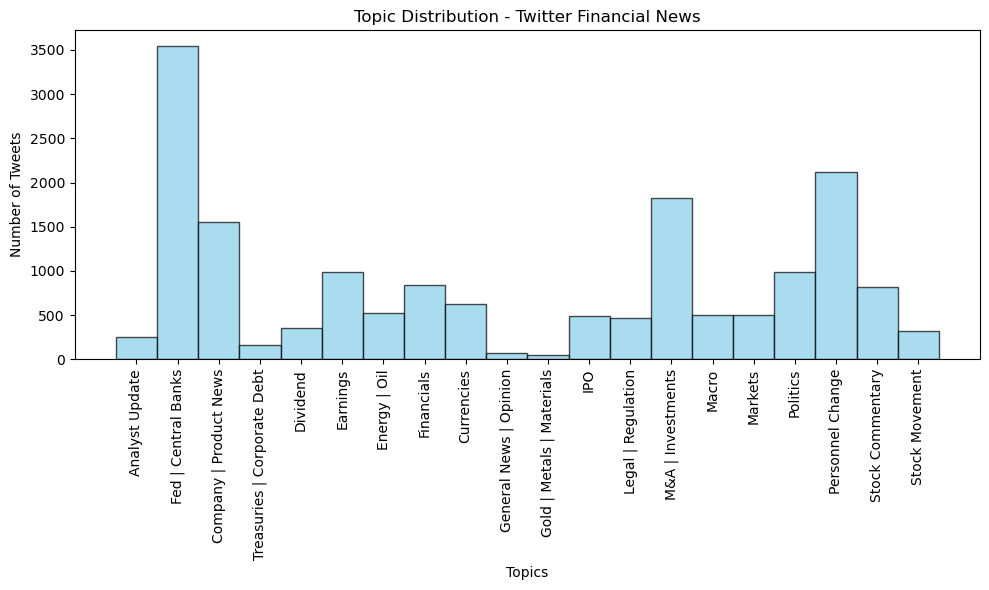

In [41]:
# Step 3: Plot the distribution of topics
import matplotlib.pyplot as plt
import numpy as np
 
plt.figure(figsize=(10, 6))
 
# Create histogram
bins = np.arange(len(topics) + 1) - 0.5
plt.hist(mapped_labels, 
         bins = bins, 
         edgecolor = 'black', 
         color = 'skyblue', 
         alpha = 0.7)
 
plt.xticks(np.arange(len(topics)),
           list(topics.values()), 
           rotation = 90, 
           ha = 'center')
 
plt.title("Topic Distribution - Twitter Financial News")
plt.xlabel("Topics")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()

https://huggingface.co/datasets/uoft-cs/cifar10

In [42]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

dataset = load_dataset('uoft-cs/cifar10')
print(dataset)

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/120M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})


In [43]:
dataset['train'][0]

{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 'label': 0}

In [58]:
images = dataset['train'][:]['img']
labels = dataset['train'][:]['label']

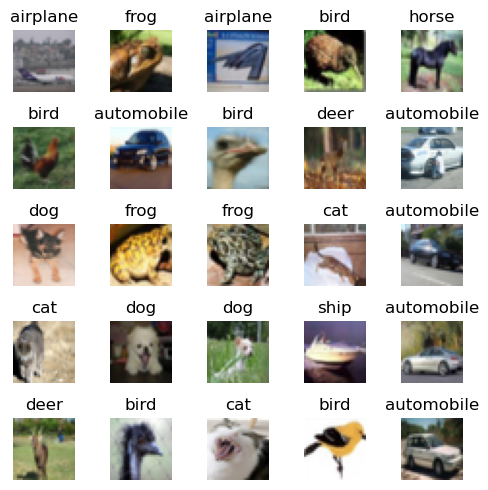

In [59]:
labels_dict = {
  0: "airplane",
  1: "automobile",
  2: "bird",
  3: "cat",
  4: "deer",
  5: "dog",
  6: "frog",
  7: "horse",
  8: "ship",
  9: "truck"
}
 
def show_images(images, labels, labels_dict):
    plt.figure(figsize=(5, 5))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(labels_dict[labels[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_images(images, labels, labels_dict)